<a href="https://colab.research.google.com/github/anruki/AthenAI_Competition/blob/main/Data_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inspection of Input data for the competition

This Notebook serves as first step of the challenge:
* Data inspection

The purpose of the following code is to examine the Input data and explain upcoming challenges for the competition.

## Preparing the Environment

1. Import Libraries

In [23]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


2. Extract zip file

In [4]:
zip_file_path = 'datos_competicion.zip'
extraction_path = 'data'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"'{zip_file_path}' unzipped to '{extraction_path}'")

'datos_competicion.zip' unzipped to 'data'


## Benchmarking Data Inspection

In [44]:
monthly_returns = pd.read_csv(r'data\benchmark_monthly_returns.csv')
yearly_returns = pd.read_csv(r'data\benchmark_yearly_returns.csv')
trades = pd.read_csv(r'data\trades_benchmark.csv')

### Benchmark Monthly Returns

In [45]:
monthly_returns.head()

,month,start_equity,end_equity,monthly_return
0,2020-06,99.704321,100.361130,0.006588
1,2020-07,99.905177,100.769788,0.008654
2,2020-08,100.914894,99.627607,-0.012756
3,2020-09,99.552244,99.891622,0.003409
4,2020-10,99.802462,98.925470,-0.008787


In [46]:
monthly_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           55 non-null     object 
 1   start_equity    55 non-null     float64
 2   end_equity      55 non-null     float64
 3   monthly_return  55 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


       start_equity  end_equity  monthly_return
count     55.000000   55.000000       55.000000
mean     109.413138  109.833834        0.003806
std        6.939229    7.118339        0.009314
min       98.798584   98.925470       -0.017930
25%      102.329535  102.688909       -0.002842
50%      109.665991  110.515179        0.004424
75%      115.036188  115.474161        0.009502
max      123.921414  125.460116        0.028126
Shape:  (55, 4)


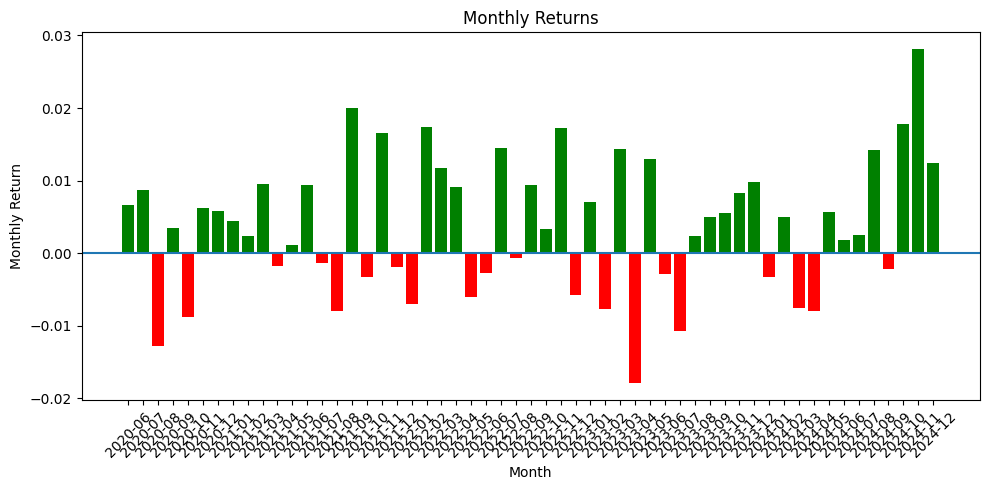

In [26]:
print(monthly_returns.describe())
print("Shape: ", monthly_returns.shape)

# Plot
colors = monthly_returns['monthly_return'].apply(lambda x: 'green' if x >= 0 else 'red')

plt.figure(figsize=(10, 5))
plt.bar(monthly_returns['month'], monthly_returns['monthly_return'], color=colors)

plt.axhline(0)
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.title('Monthly Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Benchmark Yearly Returns

In [41]:
yearly_returns.head()

,year,start_equity,end_equity,yearly_return
0,2020,99.704321,100.238699,0.005360
1,2021,100.238699,105.213037,0.049625
2,2022,105.213045,112.719458,0.071345
3,2023,112.619101,117.239680,0.041028
4,2024,117.262664,125.460116,0.069907


In [42]:
yearly_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5 non-null      int64  
 1   start_equity   5 non-null      float64
 2   end_equity     5 non-null      float64
 3   yearly_return  5 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 292.0 bytes


              year  start_equity  end_equity  yearly_return
count     5.000000      5.000000    5.000000       5.000000
mean   2022.000000    107.007566  112.174198       0.047453
std       1.581139      7.730324    9.916979       0.026893
min    2020.000000     99.704321  100.238699       0.005360
25%    2021.000000    100.238699  105.213037       0.041028
50%    2022.000000    105.213045  112.719458       0.049625
75%    2023.000000    112.619101  117.239680       0.069907
max    2024.000000    117.262664  125.460116       0.071345
Shape:  (5, 4)


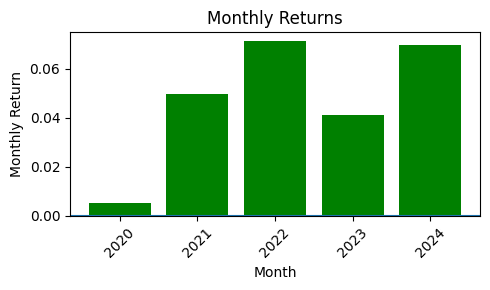

In [ ]:
print(yearly_returns.describe())
print("Shape: ", yearly_returns.shape)

# Plot
colors = yearly_returns['yearly_return'].apply(lambda x: 'green' if x >= 0 else 'red')

plt.figure(figsize=(5, 3))
plt.bar(yearly_returns['year'], yearly_returns['yearly_return'], color=colors)

plt.axhline(0)
plt.xlabel('Year')
plt.ylabel('Yearly Return')
plt.title('Yearly Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Benchmark Trades

**equity_EOD** – How much profit or loss this trade has made by the end of the day (EOD = End Of Day). Example: You bought 100 shares at $10, sold at $11 → profit $100 → equity_EOD = 100.

**AUM** – Assets Under Management. Total amount of money the portfolio manages at that moment. All the money invested in all trades + cash sitting idle. Example: you have $50,000 invested in trades and you have $10,000 in cash -> AUM = 60,000

**equity_normalized** – Equity scaled to a base




In [30]:
trades.head()

,volume,dateOpen,dateClose,total_invested_amount_EOD,equity_EOD,AUM,equity_normalized,productname
0,8000.0,2020-06-03 17:06:19.822000+00:00,2020-06-05 12:41:58.325000+00:00,91600.0,13011.403341,130114.033412,130857.142857,fpJbh
1,8000.0,2020-06-03 17:06:19.822000+00:00,2020-06-12 17:40:04.988000+00:00,106500.0,12523.605302,127675.043217,141500.000000,fpJbh
2,7000.0,2020-06-03 17:07:07.399000+00:00,2021-03-04 08:43:46.003000+00:00,91600.0,13011.403341,130114.033412,130857.142857,HcI9f
3,4000.0,2020-06-03 17:08:08.475000+00:00,2020-10-06 20:47:00.552000+00:00,91600.0,13011.403341,130114.033412,130857.142857,QEwOm
4,8000.0,2020-06-03 17:22:02.211000+00:00,2020-07-08 10:47:28.156000+00:00,91600.0,13011.403341,130114.033412,130857.142857,EFKyf


On June 3, 2020, the strategy fpJbh opened a trade of 8,000 units with $91,600, which closed on June 5 with a $13,011 profit, contributing to a total portfolio of $130,114 and a normalized equity of $130,857.

In [35]:
print(trades.describe())
print("Shape: ", trades.shape)

              volume  total_invested_amount_EOD    equity_EOD           AUM  \
count    5394.000000               5.394000e+03  5.394000e+03  5.394000e+03   
mean     7311.938821               3.991575e+06  5.671171e+05  5.549759e+06   
std     19231.714194               2.649747e+06  4.247768e+05  3.542530e+06   
min         8.000000               1.500000e+04  1.001850e+04  1.001850e+05   
25%      1200.000000               2.972000e+06  4.138719e+05  4.138719e+06   
50%      2862.000000               3.982998e+06  6.201362e+05  6.154483e+06   
75%      6837.000000               4.934650e+06  6.769763e+05  6.757100e+06   
max    500000.000000               1.479100e+07  5.025776e+06  2.983654e+07   

       equity_normalized  
count       5.394000e+03  
mean        5.663816e+06  
std         3.692205e+06  
min         2.500000e+04  
25%         4.245714e+06  
50%         5.689997e+06  
75%         7.023001e+06  
max         2.109786e+07  
Shape:  (5394, 8)


In [39]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394 entries, 0 to 5393
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   volume                     5394 non-null   float64
 1   dateOpen                   5394 non-null   object 
 2   dateClose                  5363 non-null   object 
 3   total_invested_amount_EOD  5394 non-null   float64
 4   equity_EOD                 5394 non-null   float64
 5   AUM                        5394 non-null   float64
 6   equity_normalized          5394 non-null   float64
 7   productname                5394 non-null   object 
dtypes: float64(5), object(3)
memory usage: 337.3+ KB


How does the benchmark equity evolve over time?

C:\Users\anruk\AppData\Local\Temp\ipykernel_21548\133567749.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


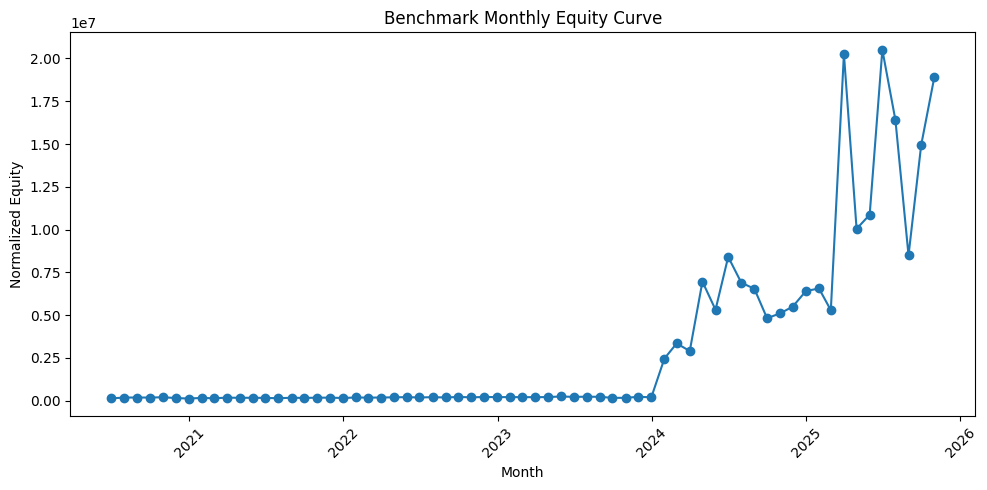

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

df = trades.copy()
df['dateClose'] = pd.to_datetime(df['dateClose'], utc=True, errors='coerce')
df = df.dropna(subset=['dateClose'])

# Sort by date
df = df.sort_values('dateClose')

# Resample monthly: take last equity of each month
monthly_equity = (
    df.set_index('dateClose')['equity_normalized']
      .resample('M')
      .last()
)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_equity.index, monthly_equity.values, marker='o')

plt.xlabel('Month')
plt.ylabel('Normalized Equity')
plt.title('Benchmark Monthly Equity Curve')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Do longer trades make more money?

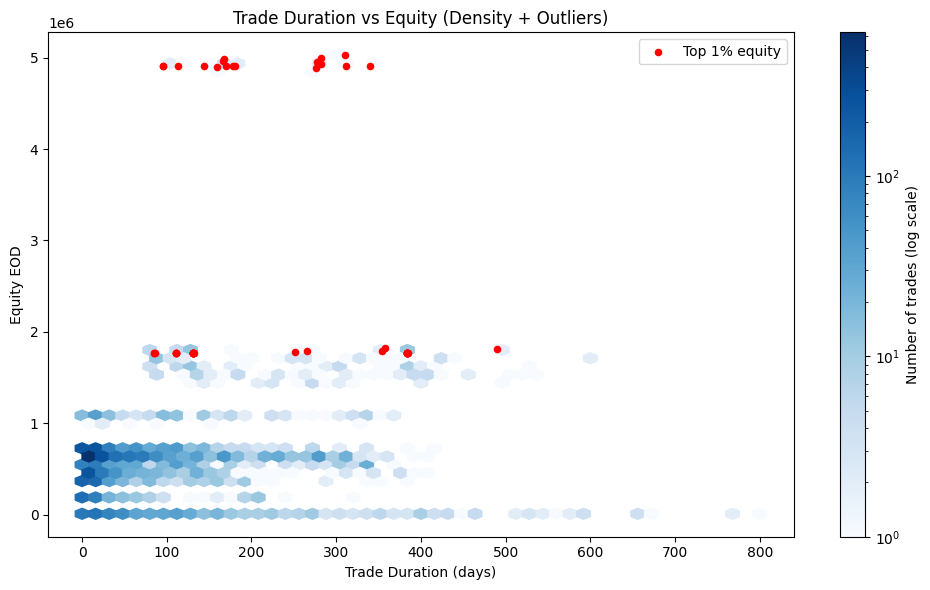

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Copy df to avoid modifying original
df = trades.copy()

# Ensure dates are datetime
df['dateOpen'] = pd.to_datetime(df['dateOpen'], utc=True, errors='coerce')
df['dateClose'] = pd.to_datetime(df['dateClose'], utc=True, errors='coerce')
df = df.dropna(subset=['dateOpen', 'dateClose'])

# Calculate duration
df['duration_days'] = (df['dateClose'] - df['dateOpen']).dt.days

# Create figure
plt.figure(figsize=(10, 6))

# Hexbin for density of most trades
hb = plt.hexbin(
    df['duration_days'], 
    df['equity_EOD'], 
    gridsize=50,       # number of bins
    cmap='Blues',      # color map
    bins='log'         # color based on log of counts
)

plt.colorbar(hb, label='Number of trades (log scale)')

# Overlay extreme trades as red dots
outliers = df[df['equity_EOD'] > df['equity_EOD'].quantile(0.99)]
plt.scatter(
    outliers['duration_days'], 
    outliers['equity_EOD'], 
    color='red', 
    s=20, 
    label='Top 1% equity'
)

plt.xlabel('Trade Duration (days)')
plt.ylabel('Equity EOD')
plt.title('Trade Duration vs Equity (Density + Outliers)')
plt.legend()
plt.tight_layout()
plt.show()


How much equity is generated per capital deployed?

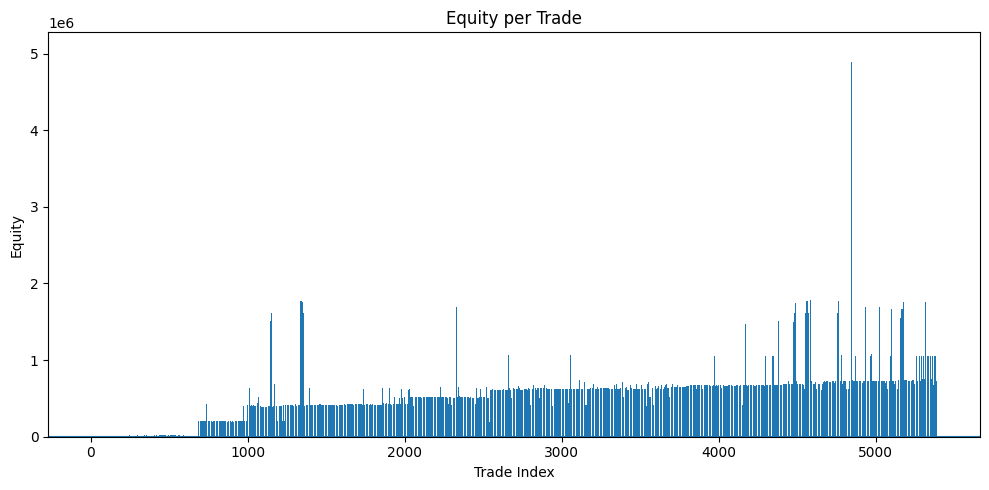

In [33]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(df)), df['equity_EOD'])

plt.axhline(0)
plt.xlabel('Trade Index')
plt.ylabel('Equity')
plt.title('Equity per Trade')
plt.tight_layout()
plt.show()


## Objective

Create an algorithm that selects investment algorithms with the objective of beating the benchmarking provided above.

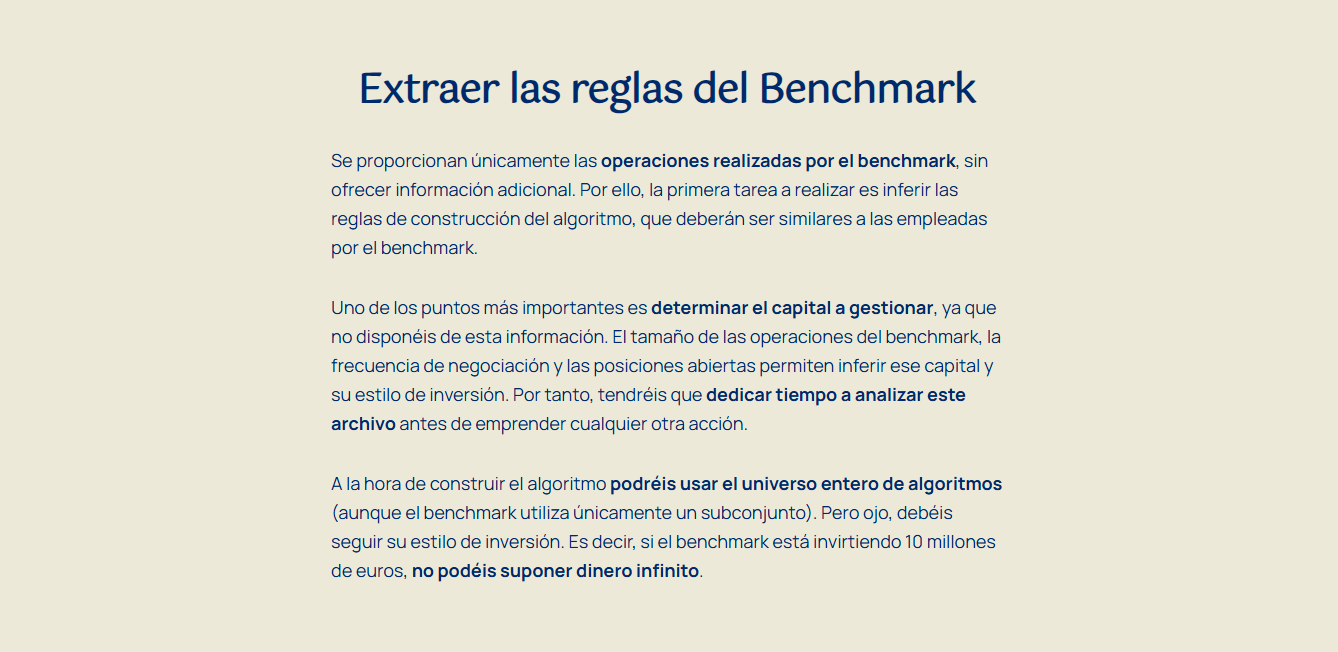

## Algoritmos Folder Inspection

The 'algoritmos' folder contains multiple csv. Here I will inspect the content of 2 random samples.

In [63]:
df = pd.read_csv(r'data\algoritmos\zZXK7.csv')
df.head()

,datetime,open,high,low,close
0,2020-06-01 21:00:00,102.69,102.69,102.69,102.69
1,2020-06-02 21:00:00,102.69,102.69,102.69,102.69
2,2020-06-03 21:00:00,102.69,102.69,102.69,102.69
3,2020-06-04 21:00:00,102.69,102.69,102.69,102.69
4,2020-06-07 21:00:00,102.69,102.69,102.69,102.69


In [65]:
df = pd.read_csv(r'data\algoritmos\ZZwML.csv')
df.head()

,datetime,open,high,low,close
0,2021-12-13 02:00:00,102.46,102.66,102.44,102.60
1,2021-12-13 06:00:00,102.60,103.06,102.59,103.03
2,2021-12-13 10:00:00,103.03,103.34,103.00,103.31
3,2021-12-13 14:00:00,103.32,103.45,103.03,103.33
4,2021-12-13 18:00:00,103.33,103.36,103.31,103.35


In [64]:
trades.head()

,volume,dateOpen,dateClose,total_invested_amount_EOD,equity_EOD,AUM,equity_normalized,productname
0,8000.0,2020-06-03 17:06:19.822000+00:00,2020-06-05 12:41:58.325000+00:00,91600.0,13011.403341,130114.033412,130857.142857,fpJbh
1,8000.0,2020-06-03 17:06:19.822000+00:00,2020-06-12 17:40:04.988000+00:00,106500.0,12523.605302,127675.043217,141500.000000,fpJbh
2,7000.0,2020-06-03 17:07:07.399000+00:00,2021-03-04 08:43:46.003000+00:00,91600.0,13011.403341,130114.033412,130857.142857,HcI9f
3,4000.0,2020-06-03 17:08:08.475000+00:00,2020-10-06 20:47:00.552000+00:00,91600.0,13011.403341,130114.033412,130857.142857,QEwOm
4,8000.0,2020-06-03 17:22:02.211000+00:00,2020-07-08 10:47:28.156000+00:00,91600.0,13011.403341,130114.033412,130857.142857,EFKyf


In [55]:
algoritmos_path = r'data\algoritmos'

# Get a list of all files in the 'algoritmos' folder
algo_files = [f for f in os.listdir(algoritmos_path) if f.endswith('.csv')]

if algo_files:
    first_algo_csv = os.path.join(algoritmos_path, algo_files[0])
    second_algo_csv = os.path.join(algoritmos_path, algo_files[100])

    print(f"Displaying the first CSV from '{algoritmos_path}': {algo_files[1]}")
    df_first_algo = pd.read_csv(first_algo_csv)
    display(df_first_algo.head())

    print(f"Displaying the 100th CSV from '{algoritmos_path}': {algo_files[100]}")
    df_second_algo = pd.read_csv(second_algo_csv)
    display(df_second_algo.head())
else:
    print(f"No CSV files found in '{algoritmos_path}'")


Displaying the first CSV from 'data\algoritmos': 00eyz.csv


,datetime,open,high,low,close
0,2022-03-14 21:00:00,100.61,100.61,100.61,100.61
1,2022-03-15 21:00:00,100.61,100.61,100.61,100.61
2,2022-03-16 21:00:00,100.61,100.61,100.61,100.61
3,2022-03-17 21:00:00,100.61,100.61,100.61,100.61
4,2022-03-18 17:00:00,100.61,100.61,100.61,100.61


Displaying the 100th CSV from 'data\algoritmos': 0hQUx.csv


,datetime,open,high,low,close
0,2020-06-01 21:00:00,127.73,127.73,127.73,127.73
1,2020-06-02 13:00:00,127.73,128.10,127.71,128.08
2,2020-06-02 21:00:00,128.08,128.08,128.08,128.08
3,2020-06-03 05:00:00,128.07,128.28,127.93,128.10
4,2020-06-03 09:00:00,128.11,128.94,126.39,128.34


In [56]:
df_first_algo.shape

(800, 5)

In [57]:
df_first_algo.tail()

,datetime,open,high,low,close
795,2024-01-30 22:00:00,89.92,89.92,89.92,89.92
796,2024-01-31 22:00:00,89.92,89.92,89.92,89.92
797,2024-02-01 22:00:00,89.92,89.92,89.92,89.92
798,2024-02-02 18:00:00,89.92,89.92,89.92,89.92
799,2024-02-04 22:00:00,89.92,89.92,89.92,89.92


In [52]:
if 'algo_files' in globals():
    num_algo_csv = len(algo_files)
    print(f"There are {num_algo_csv} CSV files in the 'algoritmos' folder.")
else:
    print("The 'algo_files' variable was not found. Please ensure the previous cell for inspecting the 'algoritmos' folder has been executed.")


There are 14761 CSV files in the 'algoritmos' folder.


In [54]:
print(df_first_algo.describe())
print(df_first_algo.shape)


             open        high         low       close
count  800.000000  800.000000  800.000000  800.000000
mean    92.362738   92.459637   92.260262   92.350262
std      3.300300    3.407429    3.195562    3.289652
min     89.920000   89.920000   89.660000   89.920000
25%     89.920000   89.920000   89.920000   89.920000
50%     89.920000   89.920000   89.920000   89.920000
75%     95.170000   95.515000   94.887500   95.147500
max    100.610000  100.630000  100.610000  100.610000
(800, 5)
